<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/Fashon_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

2.7.0
2.7.0
Num GPUs Available:  0
4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

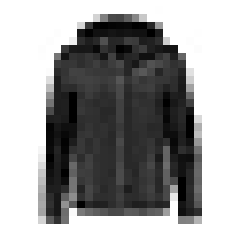

In [3]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[1]]

'T-shirt/top'

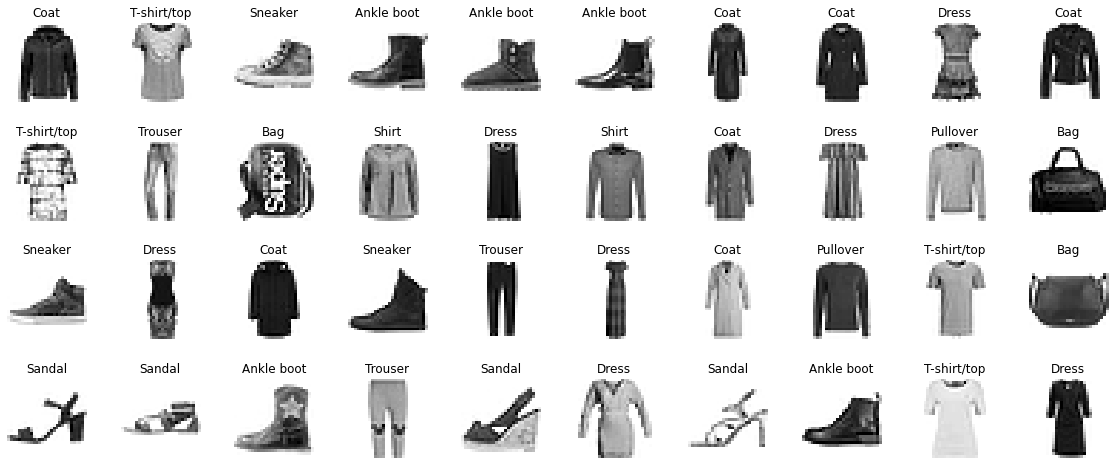

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.04721863,  0.01153429, -0.05517413, ...,  0.06547086,
         0.0324688 , -0.05010669],
       [-0.05840222, -0.01842912,  0.01278672, ...,  0.02686696,
        -0.03702381, -0.06056218],
       [ 0.03215859, -0.01522781, -0.00662429, ...,  0.02300454,
        -0.03758582, -0.0040736 ],
       ...,
       [ 0.04243419, -0.02868605, -0.02089071, ...,  0.0650648 ,
         0.06731203,  0.02884205],
       [ 0.06645453,  0.01523749,  0.01046833, ...,  0.03679645,
         0.01468857,  0.05730338],
       [-0.06996749, -0.06478845, -0.05458809, ...,  0.05782638,
         0.03808839,  0.05113465]], dtype=float32)

In [8]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
%%time

# All the loss functions are available here: 
# ... https://keras.io/api/losses/
# ... CCE: https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
# ... SCCE: https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class 

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7165 - accuracy: 0.7687 - val_loss: 0.5226 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4879 - accuracy: 0.8289 - val_loss: 0.4432 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4417 - accuracy: 0.8439 - val_loss: 0.4191 - val_accuracy: 0.8544
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4147 - accuracy: 0.8539 - val_loss: 0.3964 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3956 - accuracy: 0.8599 - val_loss: 0.3837 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3791 - accuracy: 0.8652 - val_loss: 0.3810 - val_accuracy: 0.8648
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3667 - accuracy: 0.8689 - val_loss: 0.3726 - val_accuracy:

In [10]:
print(history.params)
print(history.history.keys())


{'verbose': 1, 'epochs': 30, 'steps': 1719}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [11]:
history.history

{'accuracy': [0.768745481967926,
  0.8288727402687073,
  0.8439090847969055,
  0.8539454340934753,
  0.8599091172218323,
  0.8652363419532776,
  0.8688908815383911,
  0.8737090826034546,
  0.8755818009376526,
  0.8811272978782654,
  0.8830909132957458,
  0.885454535484314,
  0.8883273005485535,
  0.8906727433204651,
  0.891945481300354,
  0.8941272497177124,
  0.8961818218231201,
  0.8985272645950317,
  0.9009636640548706,
  0.9033454656600952,
  0.9037636518478394,
  0.9068545699119568,
  0.9066727161407471,
  0.9090545177459717,
  0.9102181792259216,
  0.9120727181434631,
  0.9139636158943176,
  0.9144545197486877,
  0.9156727194786072,
  0.9174545407295227],
 'loss': [0.7164766192436218,
  0.4879170060157776,
  0.4417344033718109,
  0.4147496819496155,
  0.39560312032699585,
  0.3791196346282959,
  0.36672243475914,
  0.35436174273490906,
  0.34461480379104614,
  0.3344019055366516,
  0.32664626836776733,
  0.3185795545578003,
  0.31124407052993774,
  0.30412161350250244,
  0.298230

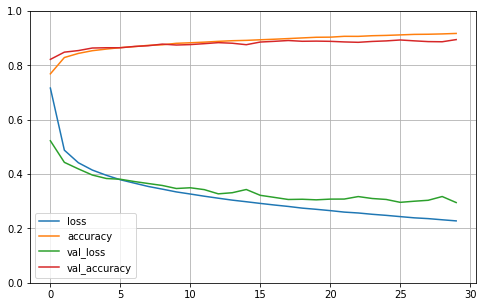

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8851


[0.32827281951904297, 0.8851000070571899]

In [14]:
X_new = X_test[:3]
print(X_new.shape) # take last 3 images
y_proba = model.predict(X_new)
y_proba.round(2)

(3, 28, 28)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [15]:
print(type(X_new))

print(X_new.min())
print(X_new.max())

<class 'numpy.ndarray'>
0.0
1.0


In [16]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 2, 1])

In [17]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [18]:
y_new = y_test[:3]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

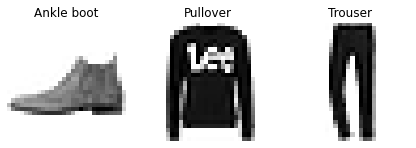

In [19]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

(28, 28)
(1, 28, 28)


array(['T-shirt/top'], dtype='<U11')

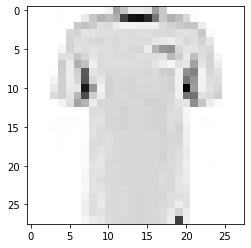

In [20]:
img_idx = 5555
img = X_test[img_idx]
plt.imshow(img, cmap="binary", interpolation="nearest")

# need to add one more dimension and model takes in 3D tensors, not 2D
print(img.shape)
print(np.expand_dims(img, axis=0).shape)

p = model.predict(np.expand_dims(img, axis=0))
np.array(class_names)[np.argmax(p, axis=-1)]